## 1 简介

本次主要通过使用```Scikit-Plot```的模块来介绍机器学习的相关可视化，```Scikit-Plot```主要包括以下几个部分：  
* estimators：用于绘制各种算法
* metrics：用于绘制机器学习的onfusion matrix, ROC AUC curves, precision-recall curves等曲线
* cluster：主要用于绘制聚类
* decomposition：主要用于绘制PCA降维

```Scikit-Plot```的地址：https://github.com/reiinakano/scikit-plot

```Scikit-Plot```的官方文档：https://scikit-plot.readthedocs.io/en/stable/

In [4]:
# 加载需要用到的模块
import scikitplot as skplt

import sklearn
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import sys

print("Scikit Plot Version : ", skplt.__version__)
print("Scikit Learn Version : ", sklearn.__version__)
print("Python Version : ", sys.version)

Scikit Plot Version :  0.3.7
Scikit Learn Version :  0.24.2
Python Version :  3.7.11 (default, Jul 27 2021, 07:03:16) 
[Clang 10.0.0 ]


## 2 加载数据集

### 2.1 手写数据集

In [5]:
digits = load_digits()
X_digits, Y_digits = digits.data, digits.target

print("Digits Dataset Size : ", X_digits.shape, Y_digits.shape)

X_digits_train, X_digits_test, Y_digits_train, Y_digits_test = train_test_split(X_digits, Y_digits,
                                                                                train_size=0.8,
                                                                                stratify=Y_digits,
                                                                                random_state=1)

print("Digits Train/Test Sizes : ",X_digits_train.shape, X_digits_test.shape, Y_digits_train.shape, Y_digits_test.shape)




Digits Dataset Size :  (1797, 64) (1797,)
Digits Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


### 2.2 肿瘤数据集

In [6]:
cancer = load_breast_cancer()
X_cancer, Y_cancer = cancer.data, cancer.target

print("Feautre Names : ", cancer.feature_names)
print("Cancer Dataset Size : ", X_cancer.shape, Y_cancer.shape)
X_cancer_train, X_cancer_test, Y_cancer_train, Y_cancer_test = train_test_split(X_cancer, Y_cancer,
                                                                                train_size=0.8,
                                                                                stratify=Y_cancer,
                                                                                random_state=1)

print("Cancer Train/Test Sizes : ",X_cancer_train.shape, X_cancer_test.shape, Y_cancer_train.shape, Y_cancer_test.shape)

Feautre Names :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Cancer Dataset Size :  (569, 30) (569,)
Cancer Train/Test Sizes :  (455, 30) (114, 30) (455,) (114,)


### 2.3 波斯顿房价数据集

In [7]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target

print("Boston Dataset Size : ", X_boston.shape, Y_boston.shape)

print("Boston Dataset Features : ", boston.feature_names)
X_boston_train, X_boston_test, Y_boston_train, Y_boston_test = train_test_split(X_boston, Y_boston,
                                                                                train_size=0.8,
                                                                                random_state=1)

print("Boston Train/Test Sizes : ",X_boston_train.shape, X_boston_test.shape, Y_boston_train.shape, Y_boston_test.shape)

Boston Dataset Size :  (506, 13) (506,)
Boston Dataset Features :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


## 3 性能可视化  

### 3.1 交叉验证绘制

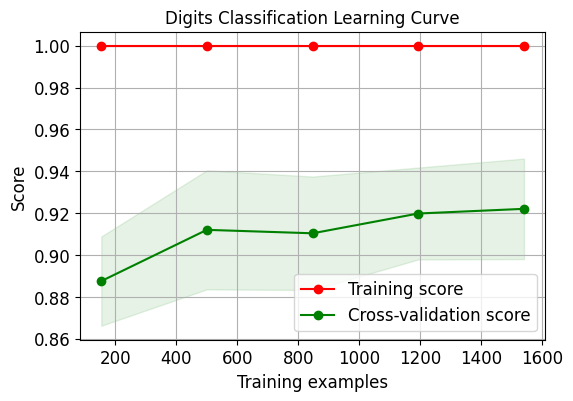

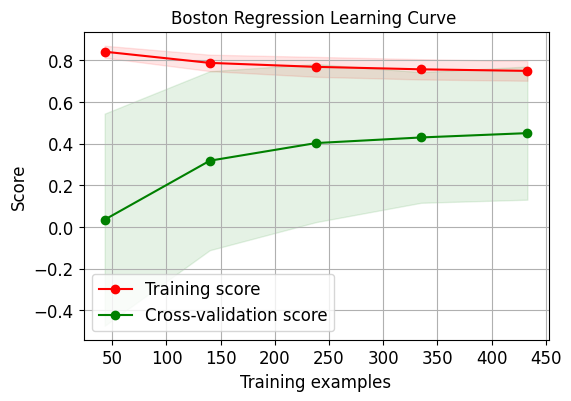

In [14]:
skplt.estimators.plot_learning_curve(LogisticRegression(), X_digits, Y_digits,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")
plt.show()

skplt.estimators.plot_learning_curve(LinearRegression(), X_boston, Y_boston,
                                     cv=7, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Boston Regression Learning Curve ");
plt.show()                                

### 3.2 重要性特征绘制

0.9096714634570764
0.9649122807017544


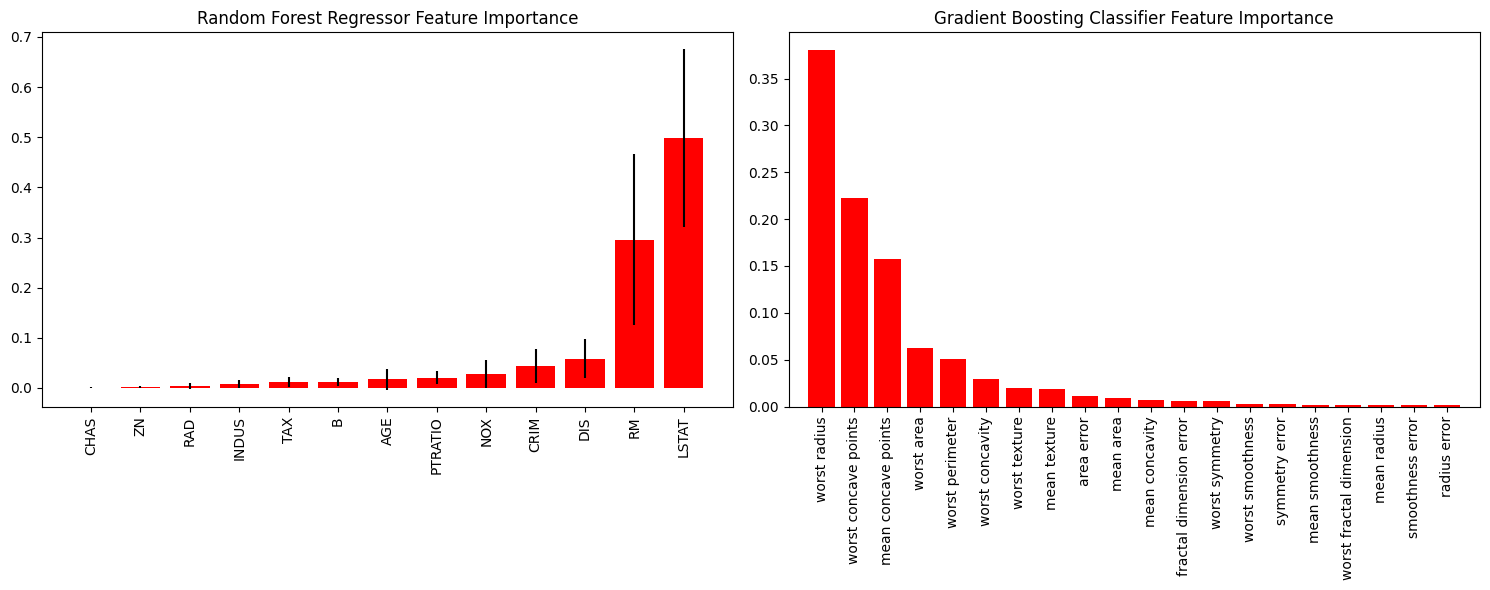

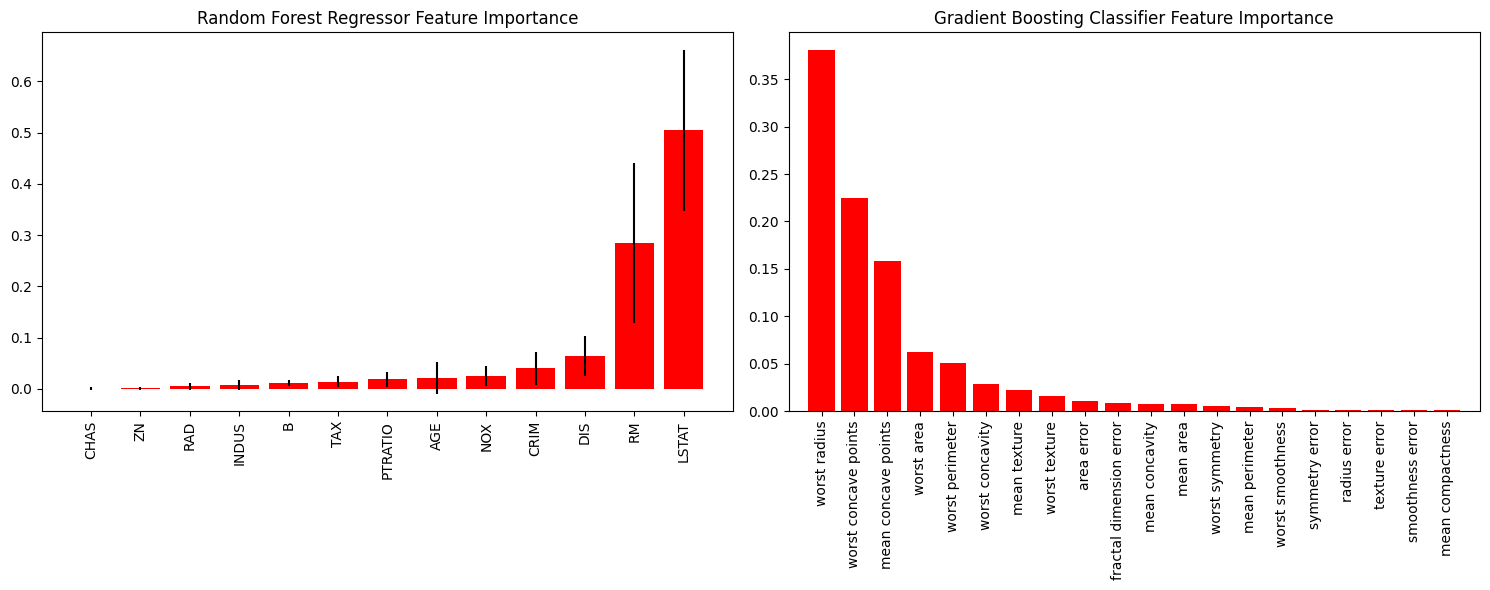

In [18]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_boston_train, Y_boston_train)
print(rf_reg.score(X_boston_test, Y_boston_test))
gb_classif = GradientBoostingClassifier()
gb_classif.fit(X_cancer_train, Y_cancer_train)
print(gb_classif.score(X_cancer_test, Y_cancer_test))

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(rf_reg, feature_names=boston.feature_names,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

ax2 = fig.add_subplot(122)
skplt.estimators.plot_feature_importances(gb_classif, feature_names=cancer.feature_names,
                                         title="Gradient Boosting Classifier Feature Importance",
                                         x_tick_rotation=90,
                                         ax=ax2);

plt.tight_layout()
plt.show()

## 4 机器学习度量(metrics)

### 4.1 混淆矩阵(Confusion Matrix)

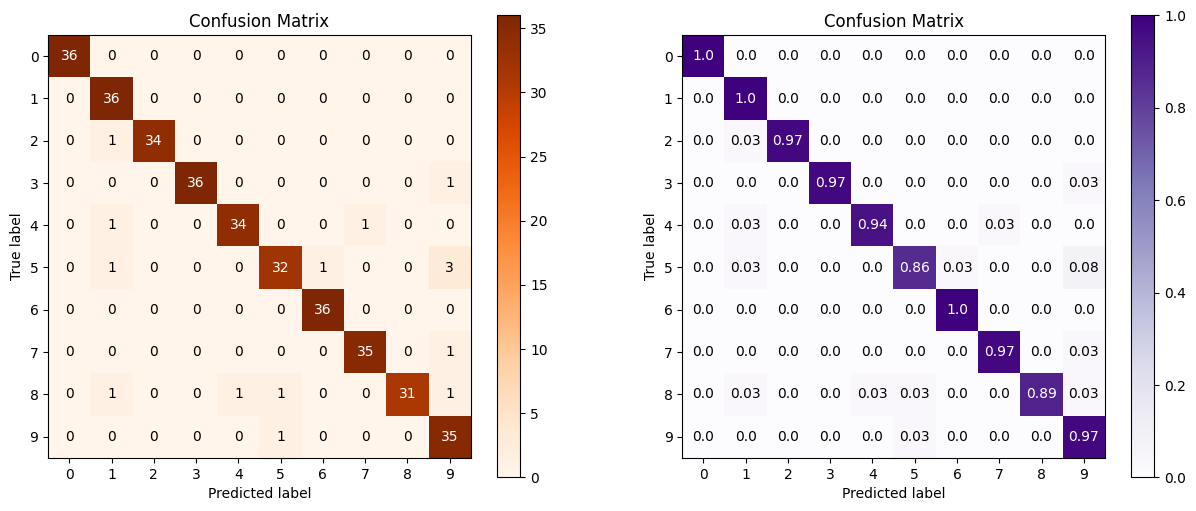

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_digits_train, Y_digits_train)
log_reg.score(X_digits_test, Y_digits_test)
Y_test_pred = log_reg.predict(X_digits_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(Y_digits_test, Y_test_pred,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(Y_digits_test, Y_test_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);
plt.show()

### 4.2 ROC、AUC曲线

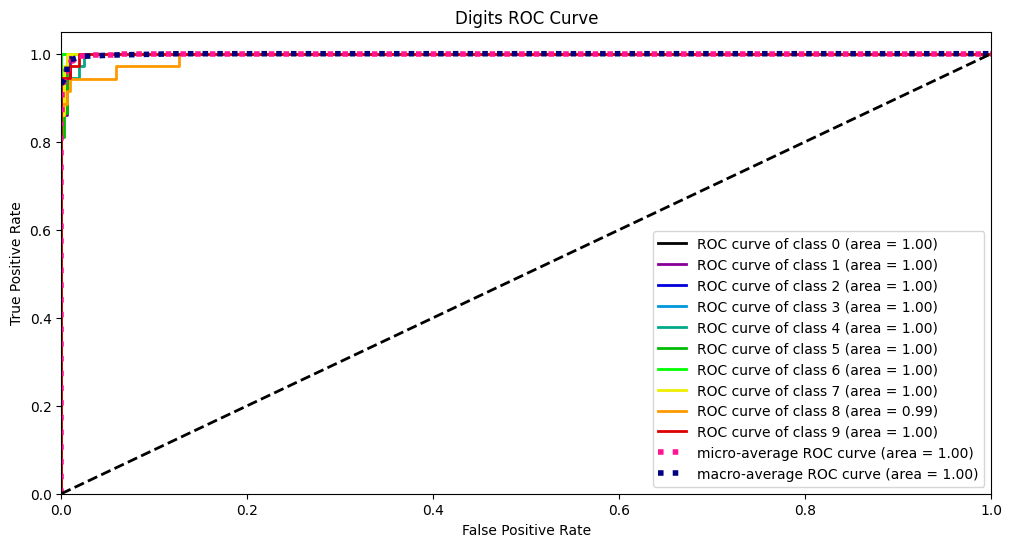

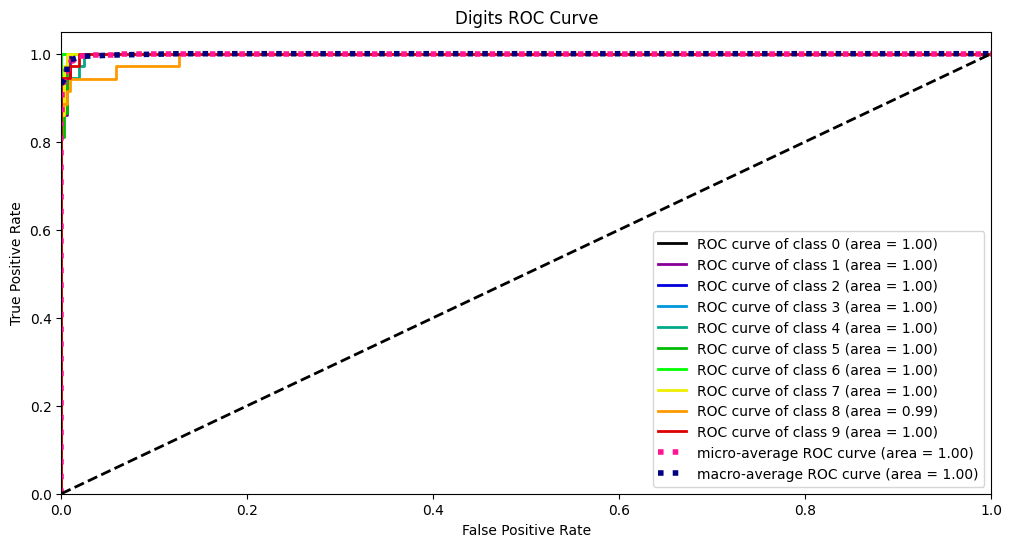

In [21]:
Y_test_probs = log_reg.predict_proba(X_digits_test)

skplt.metrics.plot_roc_curve(Y_digits_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(12,6))
plt.show()

### 4.3 PR曲线

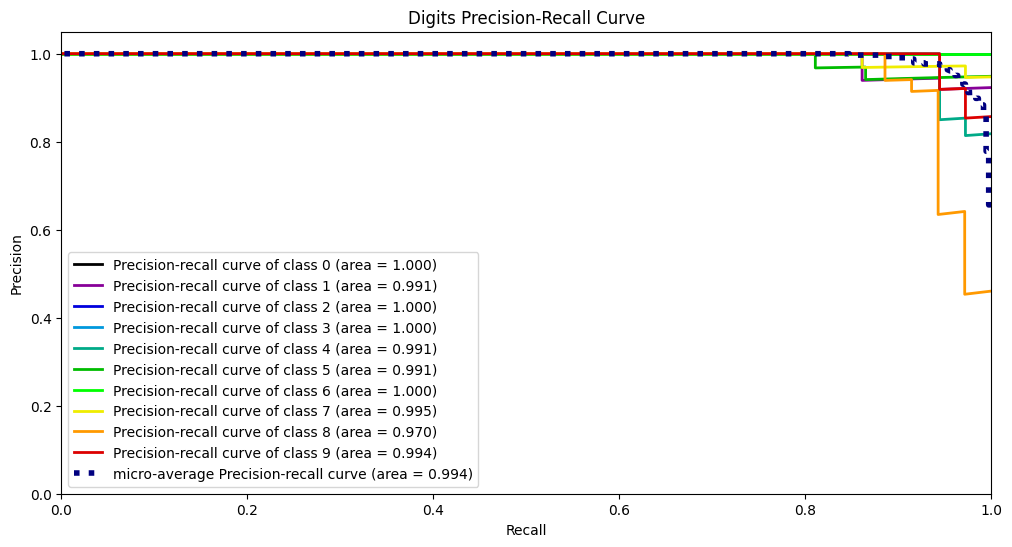

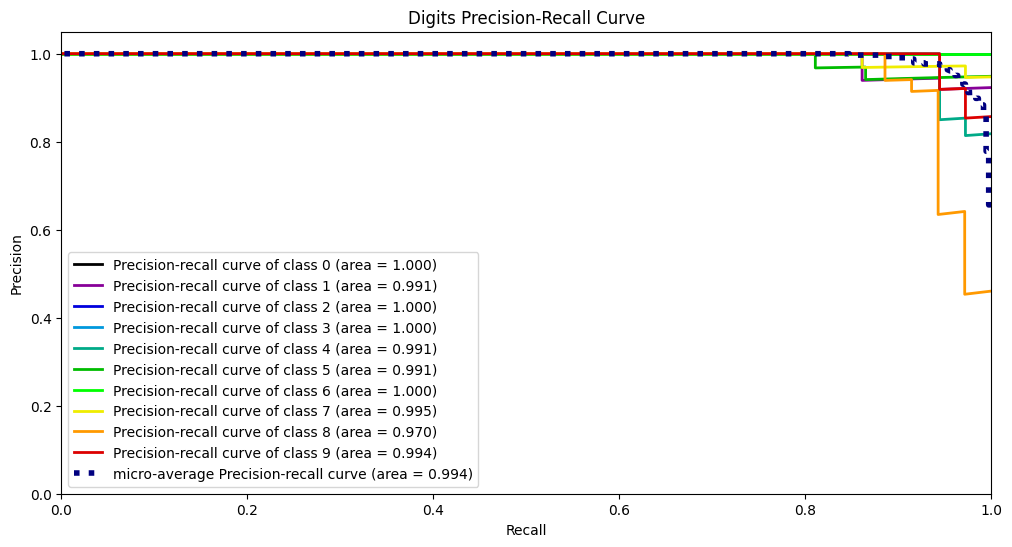

In [23]:
skplt.metrics.plot_precision_recall_curve(Y_digits_test, Y_test_probs,
                       title="Digits Precision-Recall Curve", figsize=(12,6))
plt.show()

### 4.4 轮廓分析（Silhouette Analysis）

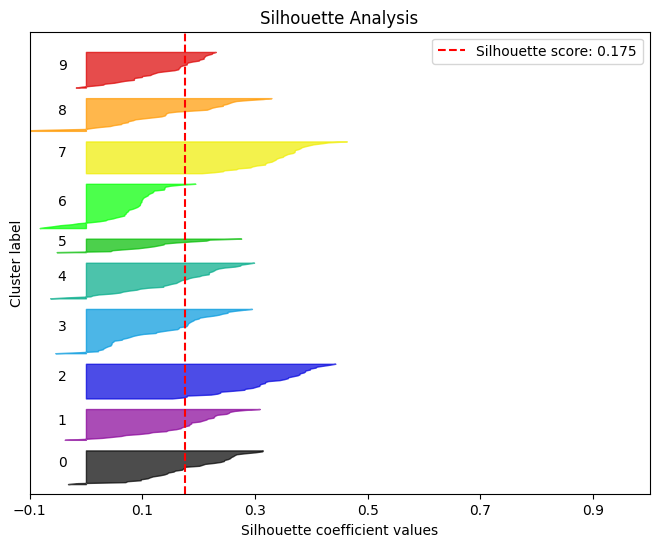

In [24]:
kmeans = KMeans(n_clusters=10, random_state=1)
kmeans.fit(X_digits_train, Y_digits_train)
cluster_labels = kmeans.predict(X_digits_test)
skplt.metrics.plot_silhouette(X_digits_test, cluster_labels,
                              figsize=(8,6))
plt.show()

### 4.5 可靠性曲线（Calibration Curve ，Reliability Curves）

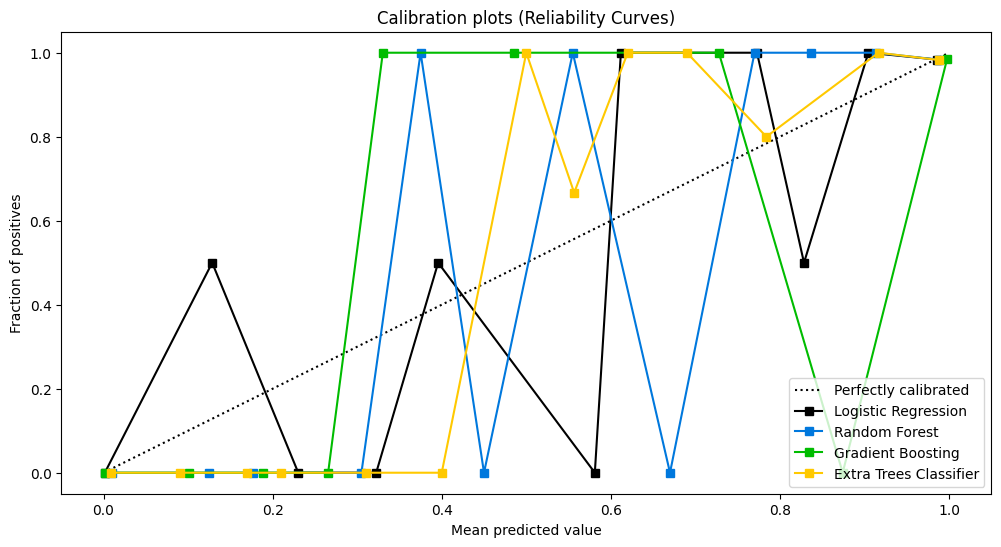

In [25]:
lr_probas = LogisticRegression().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)
rf_probas = RandomForestClassifier().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)
gb_probas = GradientBoostingClassifier().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)
et_scores = ExtraTreesClassifier().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)

probas_list = [lr_probas, rf_probas, gb_probas, et_scores]
clf_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Extra Trees Classifier']
skplt.metrics.plot_calibration_curve(Y_cancer_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(12,6)
                                     )
plt.show()

### 4.6 KS检验 

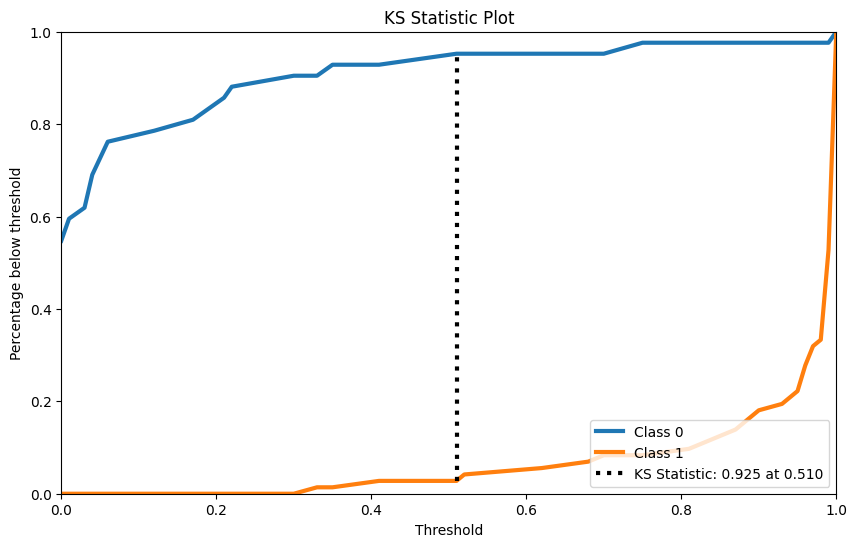

In [26]:
rf = RandomForestClassifier()
rf.fit(X_cancer_train, Y_cancer_train)
Y_cancer_probas = rf.predict_proba(X_cancer_test)

skplt.metrics.plot_ks_statistic(Y_cancer_test, Y_cancer_probas, figsize=(10,6))
plt.show()

### 4.7 累积收益曲线

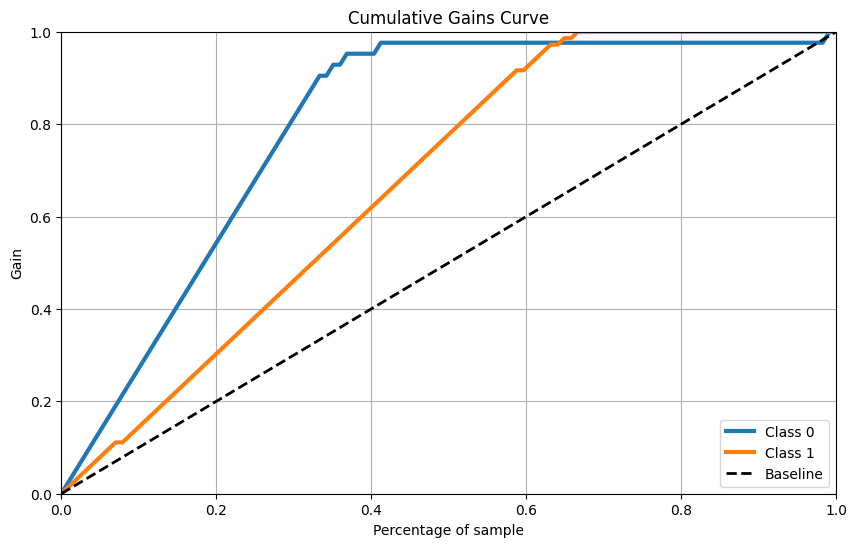

In [27]:

skplt.metrics.plot_cumulative_gain(Y_cancer_test, Y_cancer_probas, figsize=(10,6))
plt.show()

### 4.8 Lift 曲线

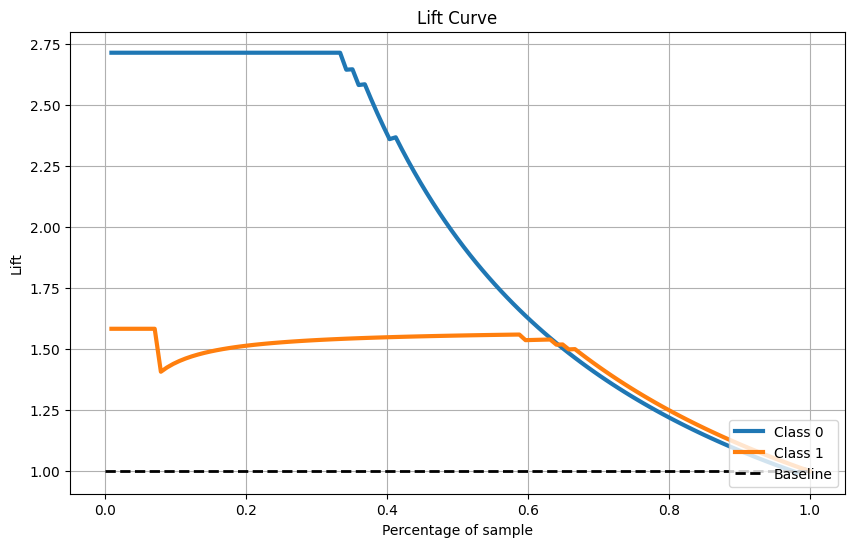

In [28]:
skplt.metrics.plot_lift_curve(Y_cancer_test, Y_cancer_probas, figsize=(10,6))
plt.show()

## 5 聚类方法

### 5.1 手肘法（Elbow Method）

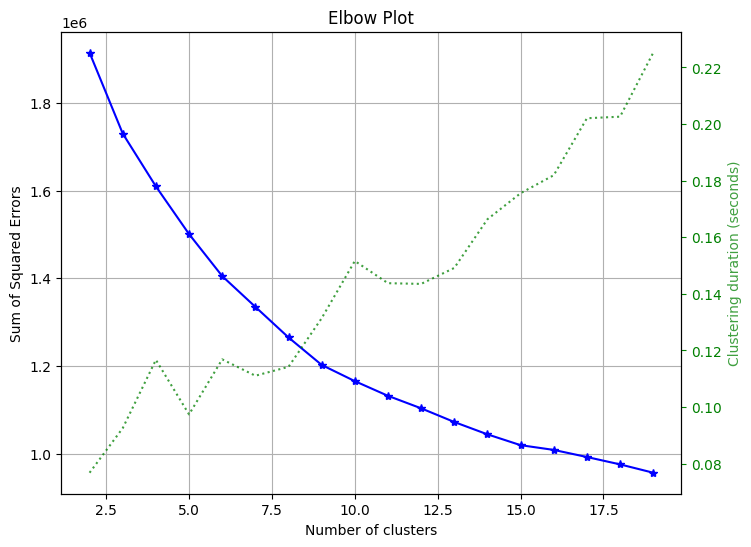

In [29]:
skplt.cluster.plot_elbow_curve(KMeans(random_state=1),
                               X_digits,
                               cluster_ranges=range(2, 20),
                               figsize=(8,6))
plt.show()

## 6 降维方法

### 6.1 PCA

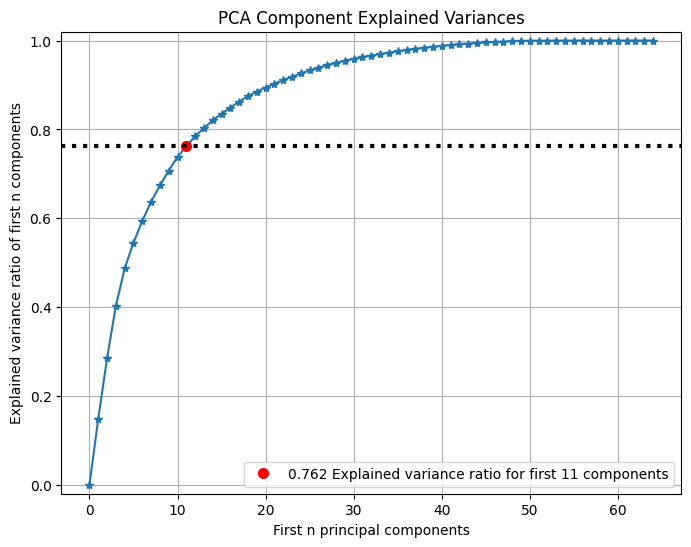

In [30]:
pca = PCA(random_state=1)
pca.fit(X_digits)

skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6))
plt.show()

### 6.2 2-D Projection

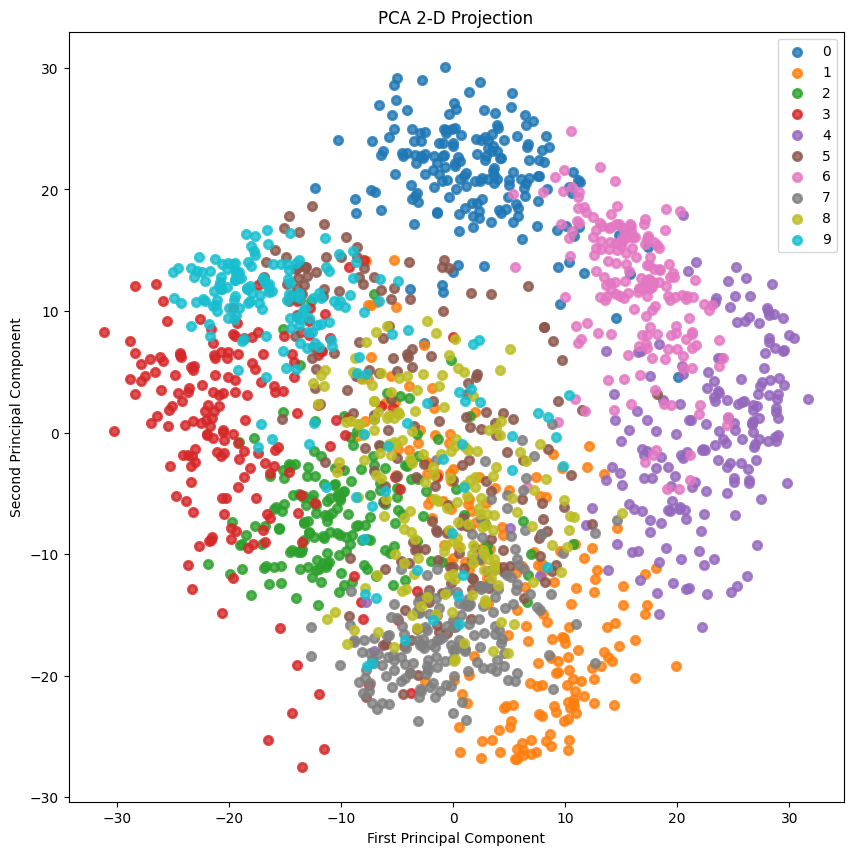

In [35]:
skplt.decomposition.plot_pca_2d_projection(pca, X_digits, Y_digits,
                                           figsize=(10,10),
                                           cmap="tab10")
plt.show()